In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# 경고 메시지 무시 설정
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', module='matplotlib')

In [217]:
train_data = pd.read_csv('/content/drive/MyDrive/playground-series-s4e1/train.csv')

# 기술통계 분석

In [4]:
train_data.info() # 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [28]:
 train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


결측값 확인


In [7]:
train_data.isnull().sum()

,0
id,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


### 이탈율 확인

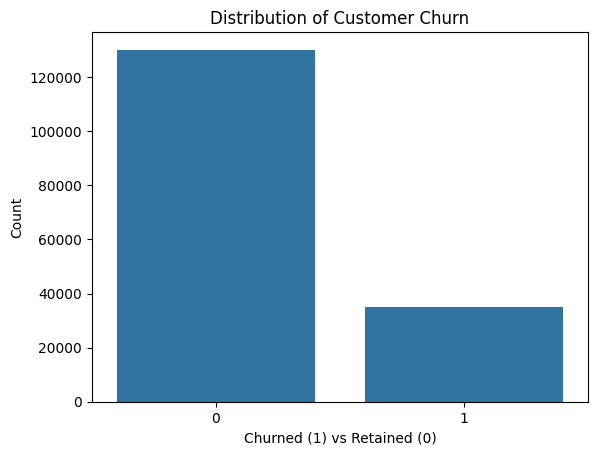

In [39]:
plt.figure()
sns.countplot(x='Exited', data=train_data)
plt.title('Distribution of Customer Churn')
plt.xlabel('Churned (1) vs Retained (0)')
plt.ylabel('Count')
plt.show()

### 범주형 변수


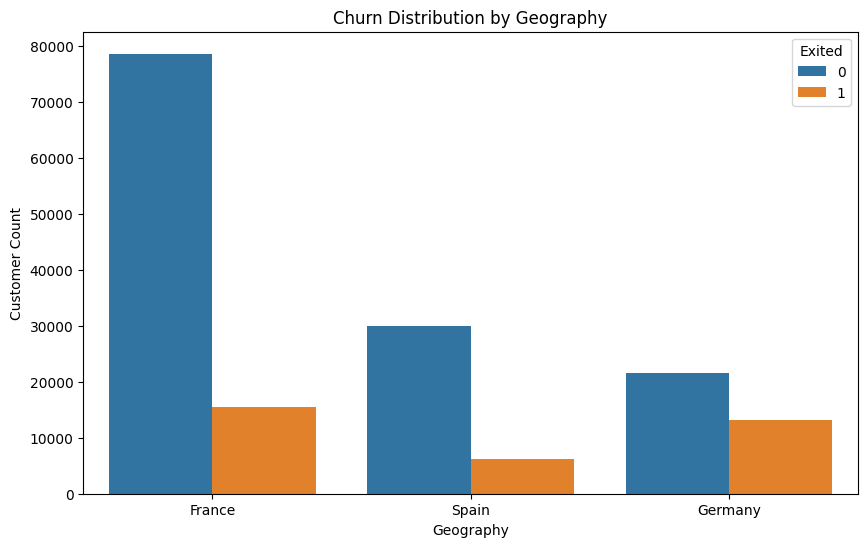


Churn rate by Geography:
Geography
Germany    0.378952
Spain      0.172176
France     0.165282
Name: Exited, dtype: float64


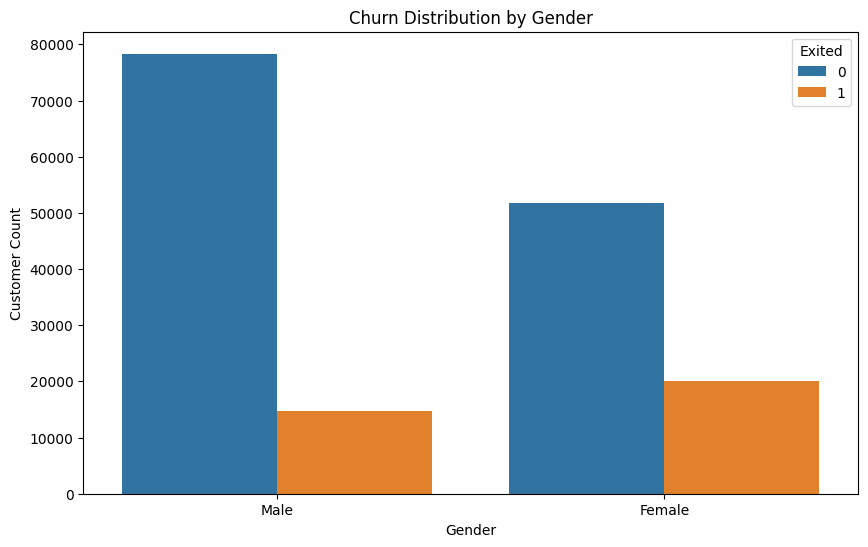


Churn rate by Gender:
Gender
Female    0.279687
Male      0.159055
Name: Exited, dtype: float64


In [32]:
# 6. 범주형 변수 탐색
categorical_features = ['Geography', 'Gender']
for feature in categorical_features:
    # 시각화
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Exited', data=train_data)
    plt.title(f'Churn Distribution by {feature}')
    plt.ylabel('Customer Count')
    plt.show()
    # 각 범주별 이탈률
    print(f"\nChurn rate by {feature}:")
    print(train_data.groupby(feature)['Exited'].mean().sort_values(ascending=False))


독일인일 경우 이탈율이 37.8%로 가장 높음   
여성이 남성보다 이탈율 높음 (27%)

#### Geography
  - 고객의 거주 국가를 나타냄
  - 독일인의 이탈율이 가장 높게 나타남
  - 프랑스인의 이탈율이 가장 낮게 나타남

#### Gender
  - 고객의 성별을 나타냄
  - 여성이 이탈율이 상대적으로 높게 *나타남*

### 수치형 *변수*

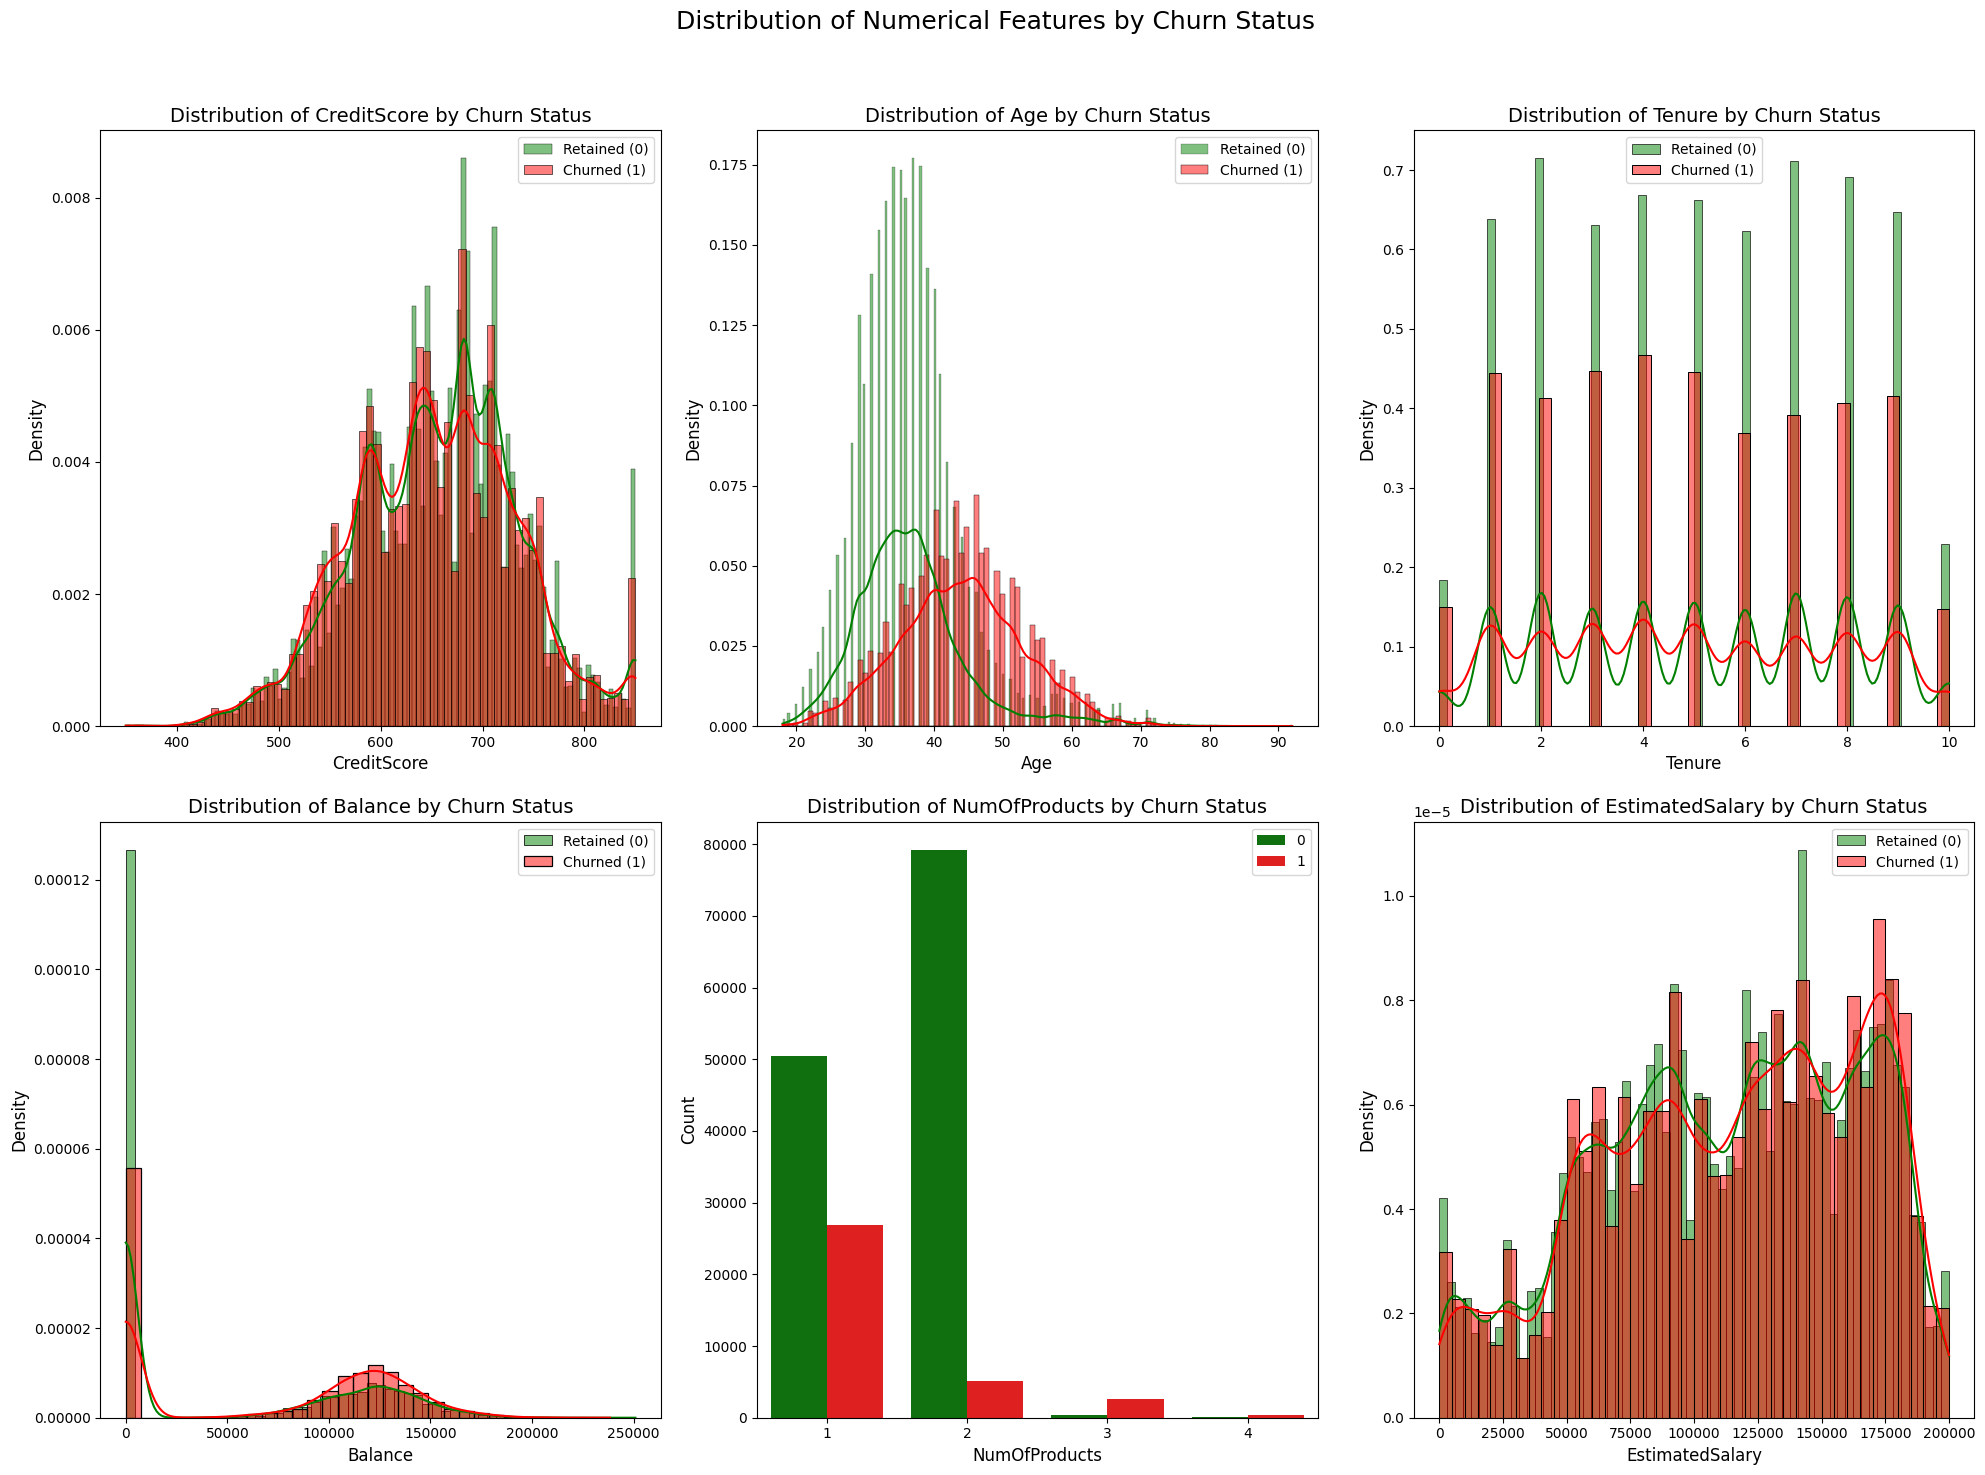

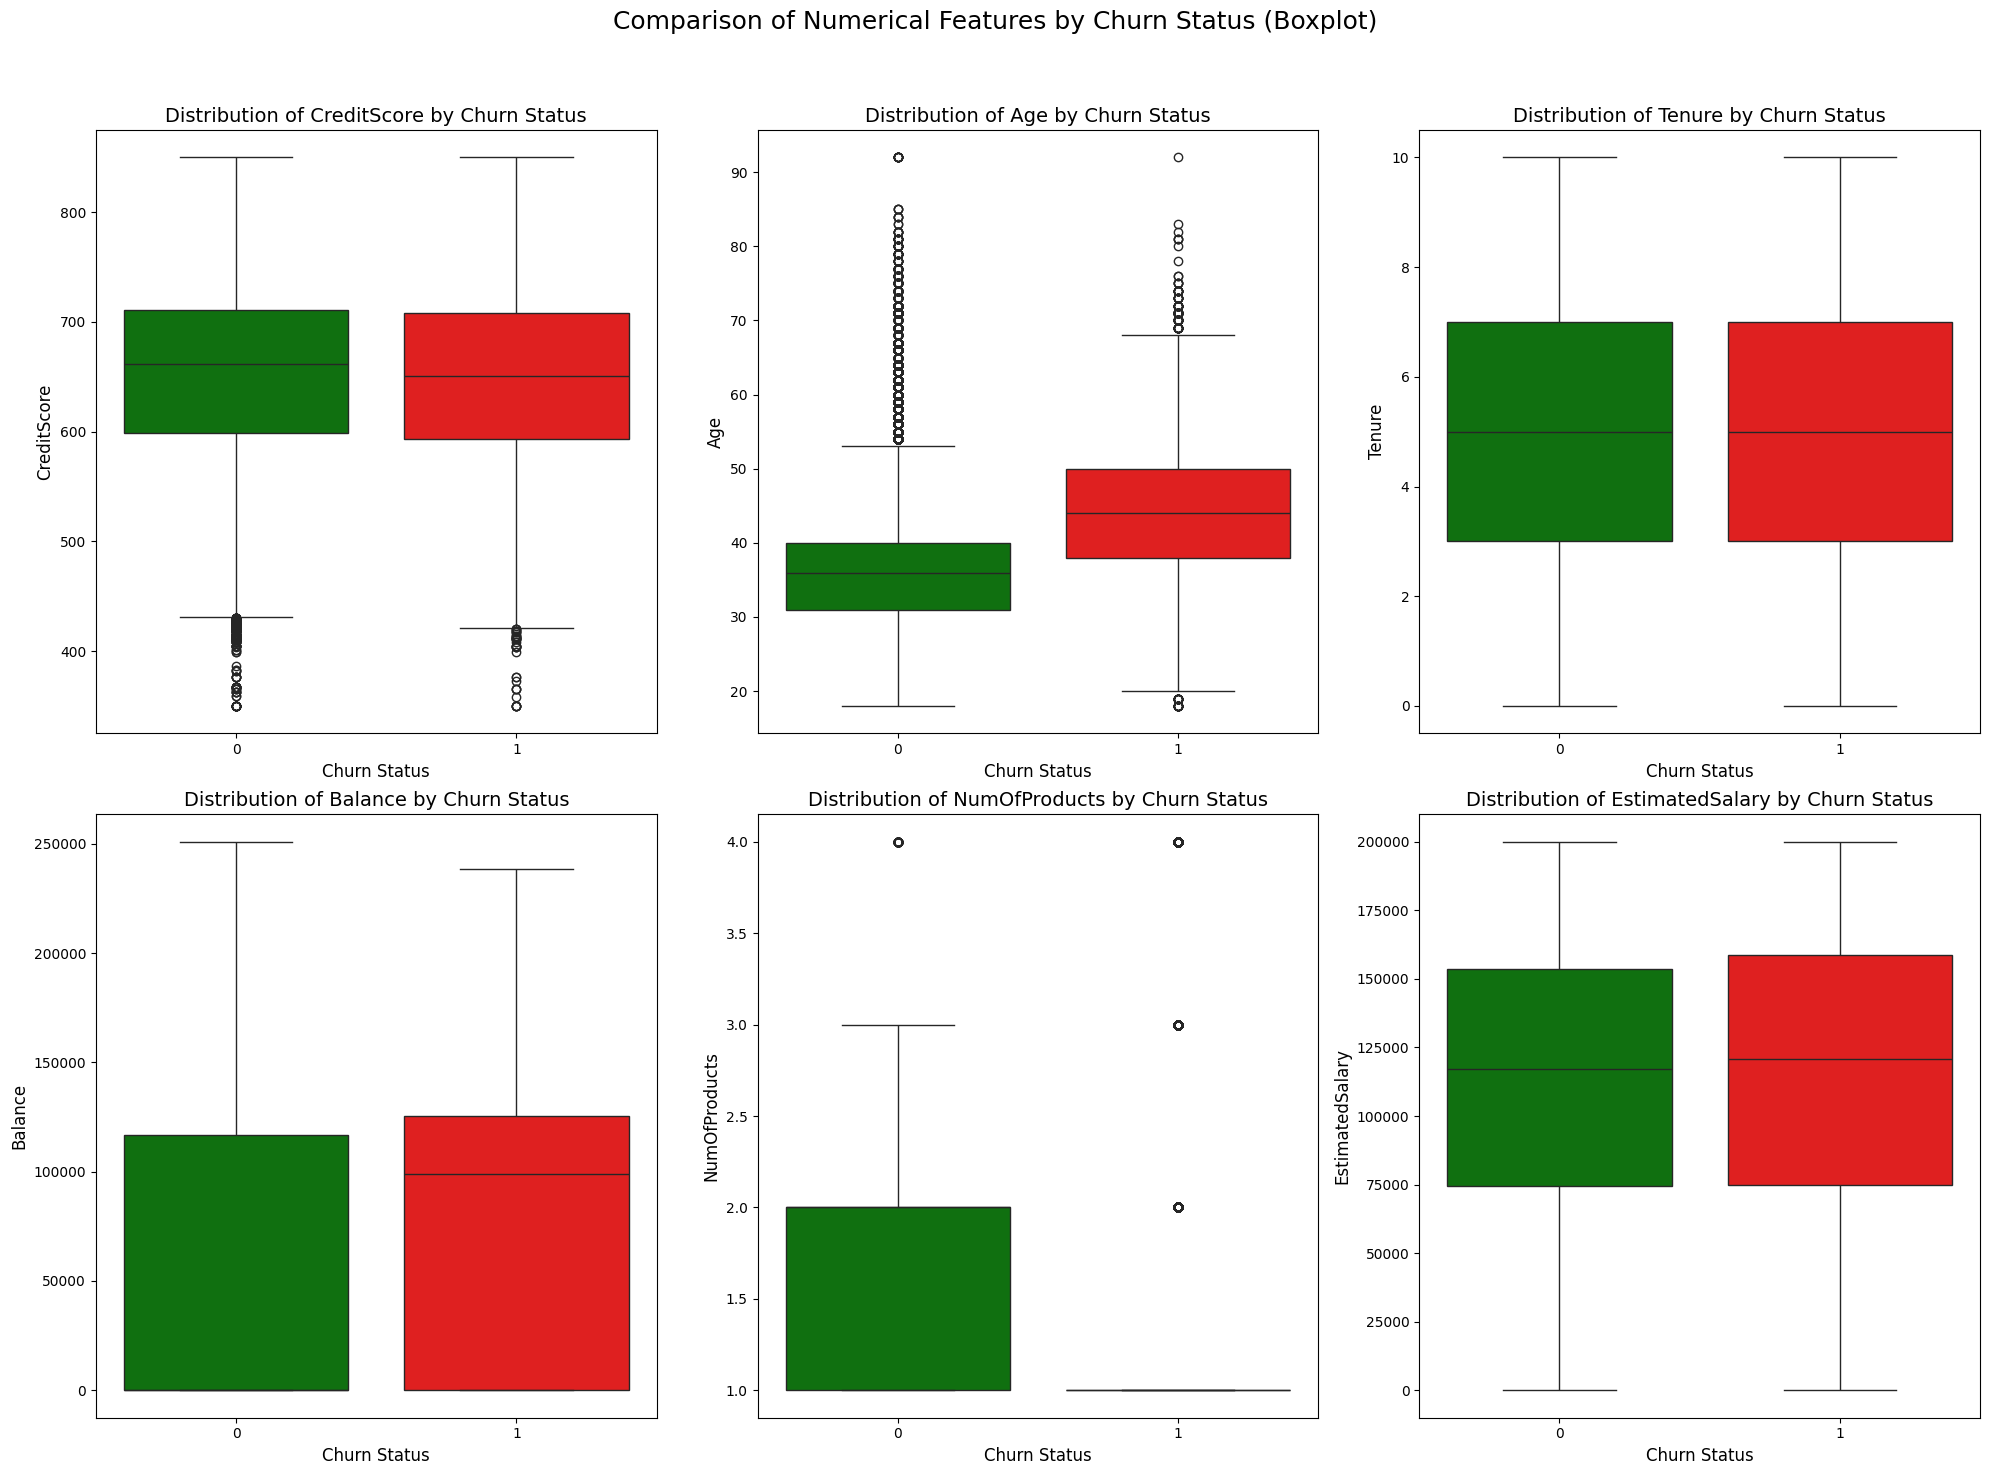

In [65]:
# 수치형 변수 목록
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# 이탈 여부에 따른 그룹 정의
churned = train_data[train_data['Exited'] == 1]
retained = train_data[train_data['Exited'] == 0]

# 모든 수치형 변수에 대한 히스토그램 - 각 변수별 x축 범위 조정
plt.figure(figsize=(20, 15))

for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)

    # 각 변수의 범위 결정
    x_min = train_data[feature].min()
    x_max = train_data[feature].max()

    # NumOfProducts는 이산값이므로 히스토그램 대신 카운트플롯 사용
    if feature == 'NumOfProducts':
        # 이탈 여부에 따른 막대 그래프
        sns.countplot(x=feature, hue='Exited', data=train_data, palette=['green', 'red'])
        plt.legend('Retained', 'Exited')
    else:
        # 유지 고객과 이탈 고객 분포 별도 표시
        sns.histplot(data=retained, x=feature, color='green', label='Retained (0)',
                    alpha=0.5, kde=True, stat='density', common_norm=False)
        sns.histplot(data=churned, x=feature, color='red', label='Churned (1)',
                    alpha=0.5, kde=True, stat='density', common_norm=False)

    # 그래프 꾸미기
    plt.title(f'Distribution of {feature} by Churn Status', fontsize=14)
    plt.xlabel(feature, fontsize=12)

    if feature == 'NumOfProducts':
        plt.ylabel('Count', fontsize=12)
    else:
        plt.ylabel('Density', fontsize=12)

    # 범례 표시
    plt.legend()


plt.suptitle('Distribution of Numerical Features by Churn Status', fontsize=18, y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# 박스플롯도 개선 (y축 범위 조정)
plt.figure(figsize=(20, 15))

for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    # 박스플롯 그리기
    ax = sns.boxplot(x='Exited', y=feature, data=train_data, palette=['green', 'red'])
    plt.title(f'Distribution of {feature} by Churn Status', fontsize=14)
    plt.xlabel('Churn Status', fontsize=12)
    plt.ylabel(feature, fontsize=12)



plt.suptitle('Comparison of Numerical Features by Churn Status (Boxplot)', fontsize=18, y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

#### CreditScore
  - 고객의 신용 점수를 나타냄   

#### Age
  - 고객의 나이를 나타냄
  - 이탈한 고객이 상대적으로 나이가 더 많음

#### Tenure
  - 거래 기간을 나타냄
  - 0~10 사이의 값을 가짐
  - 0년 미만의 이탈율이 높게 나타남

#### Balance
  - 계좌 잔액을 나타냄
  - 잔액이 0인 고객이 많음

#### NumOfProducts
  - 고객이 이용중인 은행 상품 개수를 나타냄
  - 대부분의 경우 1~2개 사용
  - 3개 이상의 상품을 이용하는 고객의 이탈율이 높게 나타남

#### EstimatedSalary
  - 고객의 연간 소득을 나타냄 (추정)
  - 연간 소득이 이탈율과 큰 상관관계가 나타나는것으로 보이지는 않음

### 이진형 변수

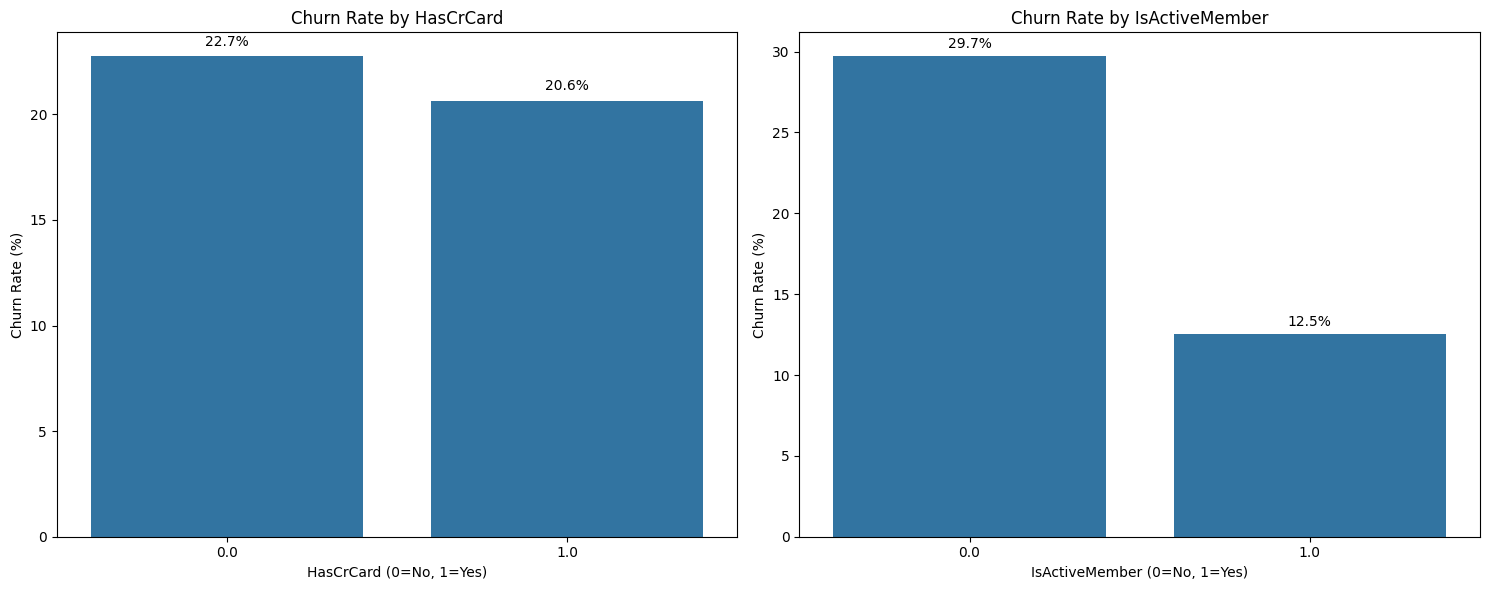


HasCrCard - Churn Rate:
HasCrCard
0.0    22.742944
1.0    20.643264
Name: Exited, dtype: float64

IsActiveMember - Churn Rate:
IsActiveMember
0.0    29.708632
1.0    12.534541
Name: Exited, dtype: float64


In [41]:
# 이진형 변수 목록
binary_features = ['HasCrCard', 'IsActiveMember']

plt.figure(figsize=(15, 6))

for i, feature in enumerate(binary_features):
    plt.subplot(1, 2, i+1)

    # 이진형 변수 값별 이탈률 계산
    churn_by_feature = train_data.groupby(feature)['Exited'].mean() * 100

    # 바 차트로 이탈률 시각화
    ax = sns.barplot(x=churn_by_feature.index, y=churn_by_feature.values)

    # 그래프 꾸미기
    plt.title(f'Churn Rate by {feature}')
    plt.xlabel(f'{feature} (0=No, 1=Yes)')
    plt.ylabel('Churn Rate (%)')

    # 값 표시
    for i, v in enumerate(churn_by_feature.values):
        ax.text(i, v + 0.5, f"{v:.1f}%", ha='center')

plt.tight_layout()
plt.show()

# 간단한 통계 출력
for feature in binary_features:
    print(f"\n{feature} - Churn Rate:")
    print(train_data.groupby(feature)['Exited'].mean() * 100)

#### HasCrCard
  - 고객의 신용카드 보유 여부를 나타냄

#### IsActiveMember
  - 고객의 활성 회원 여부를 나타냄
  - 비활성 회원의 이탈율이 상대적으로 높게 나타남

## 특성 선택


상관계수 (내림차순 정렬):
Age: 0.3408
Balance: 0.1297
Geography: 0.0533
EstimatedSalary: 0.0188
Tenure: -0.0196
HasCrCard: -0.0221
CreditScore: -0.0274
Gender: -0.1464
IsActiveMember: -0.2102
NumOfProducts: -0.2146


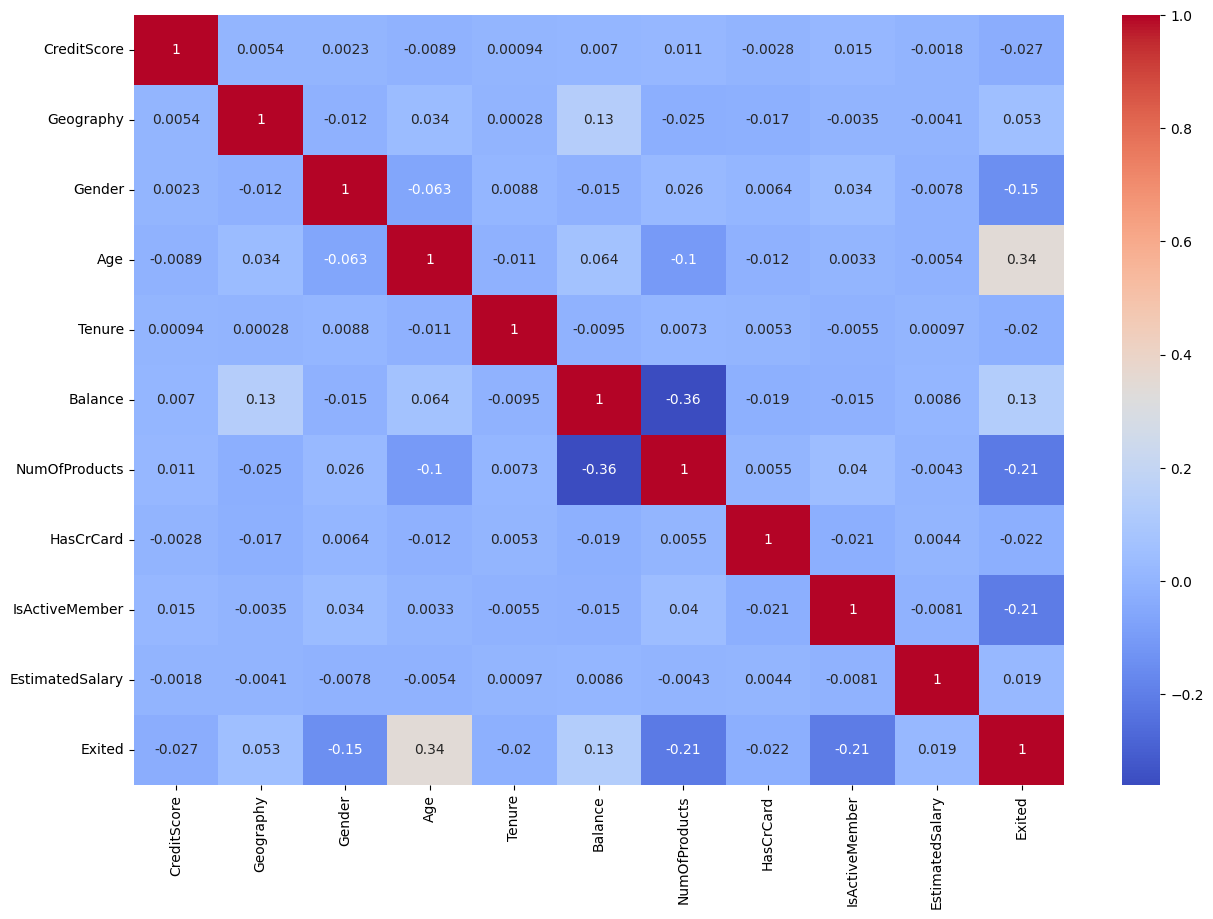

In [244]:
# 데이터 복사본 생성 (원본 보존)
data_encoded = train_data.copy()

# 레이블 인코딩
geo_encoder = LabelEncoder()
data_encoded['Geography'] = geo_encoder.fit_transform(data_encoded['Geography'])

gender_encoder = LabelEncoder()
data_encoded['Gender'] = gender_encoder.fit_transform(data_encoded['Gender'])


analysis_vars = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
                'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                'EstimatedSalary', 'Exited']

# 히트맵
corr_matrix = data_encoded[analysis_vars].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

sorted_corr = corr_with_target.sort_values(ascending=False)     # 내림차순 정렬
print("\n상관계수 (내림차순 정렬):")
for feature, corr_value in sorted_corr.items():
    print(f"{feature}: {corr_value:.4f}")

In [245]:
#파생 변수 생성

# 주요 위험 요소 점수 (0~3점 척도)
data_encoded['Churn_Risk_Score'] = (
    (train_data['Age'] >= 45).astype(int) +     # 고령
    (train_data['IsActiveMember'] == 0).astype(int) +  # 비활성
    (train_data['NumOfProducts'] >= 3).astype(int)   # 다중 상품
)

#연봉대비 저축률
data_encoded['savings_ratio'] = (train_data['Balance'] / train_data['EstimatedSalary']).astype(float)


# 단일 상품 장기고객
data_encoded['Single-Product_Loyalists'] = (
    (train_data['Tenure'] >=3) & (train_data['NumOfProducts'] <= 1)
).astype(int)

# 상품 당 금융총량
data_encoded['FinancialCapacity'] = ((train_data['Balance'] + train_data['EstimatedSalary']) / train_data['NumOfProducts']).astype(float)

# 45세 이상
data_encoded['senior'] = ((train_data['Age']>=45)).astype(int)

In [241]:
data_encoded.describe()

,id,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn_Risk_Score,Single-Product_Loyalists,FinancialCapacity,old_poor,senior
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,0.648545,0.564429,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599,0.714580,0.355254,129191.807576,0.191936,0.191936
std,47641.3565,7.139782e+04,80.103340,0.816574,0.495833,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443,0.669802,0.478592,86656.764995,0.393824,0.393824
min,0.0000,1.556570e+07,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,45.035000,0.000000,0.000000
25%,41258.2500,1.563314e+07,597.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000,0.000000,0.000000,61737.890000,0.000000,0.000000
50%,82516.5000,1.569017e+07,659.000000,0.000000,1.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000,1.000000,0.000000,99568.467500,0.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,1.000000,1.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000,1.000000,1.000000,189693.772500,0.000000,0.000000
max,165033.0000,1.581569e+07,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,3.000000,1.000000,408548.630000,1.000000,1.000000



상관계수 (내림차순 정렬):
Age: 0.3408
Balance: 0.1297
Geography: 0.0533
EstimatedSalary: 0.0188
Tenure: -0.0196
HasCrCard: -0.0221
CreditScore: -0.0274
Gender: -0.1464
IsActiveMember: -0.2102
NumOfProducts: -0.2146


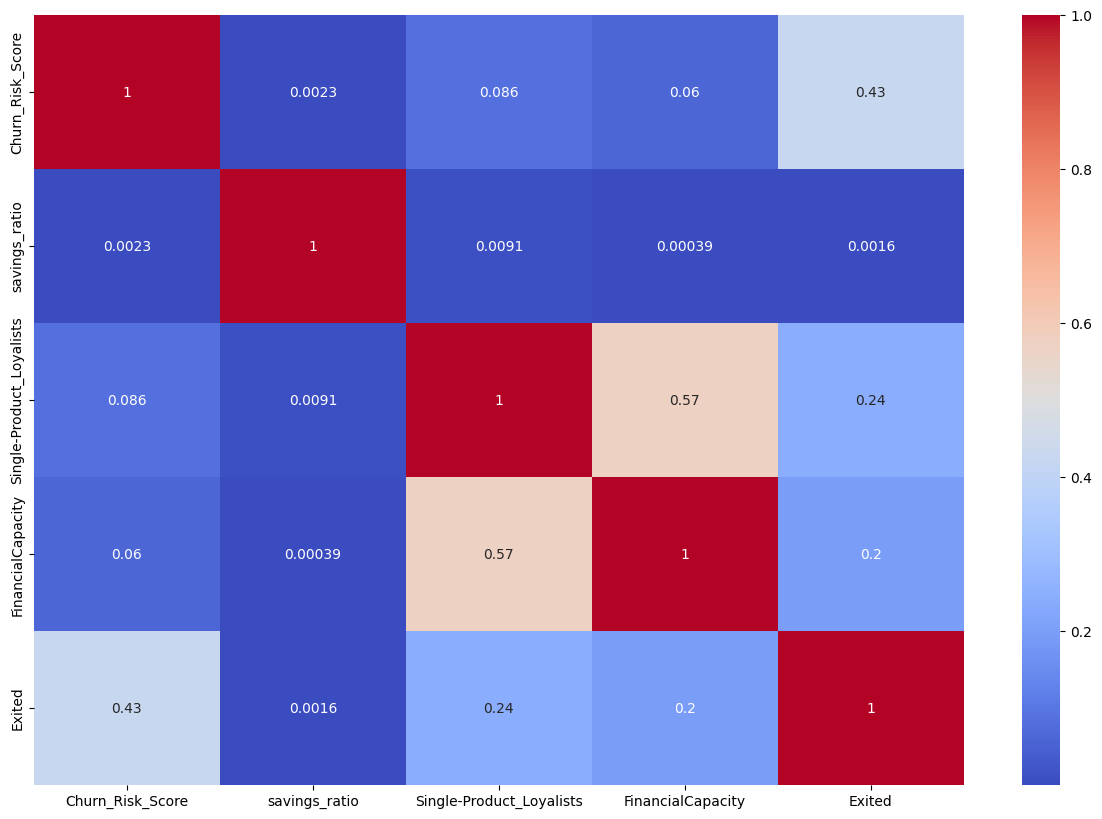

In [246]:
new_features = ['Churn_Risk_Score','savings_ratio','Single-Product_Loyalists','FinancialCapacity','Exited']

# 히트맵
corr_matrix = data_encoded[new_features].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

sorted_corr = corr_with_target.sort_values(ascending=False)     # 내림차순 정렬
print("\n상관계수 (내림차순 정렬):")
for feature, corr_value in sorted_corr.items():
    print(f"{feature}: {corr_value:.4f}")

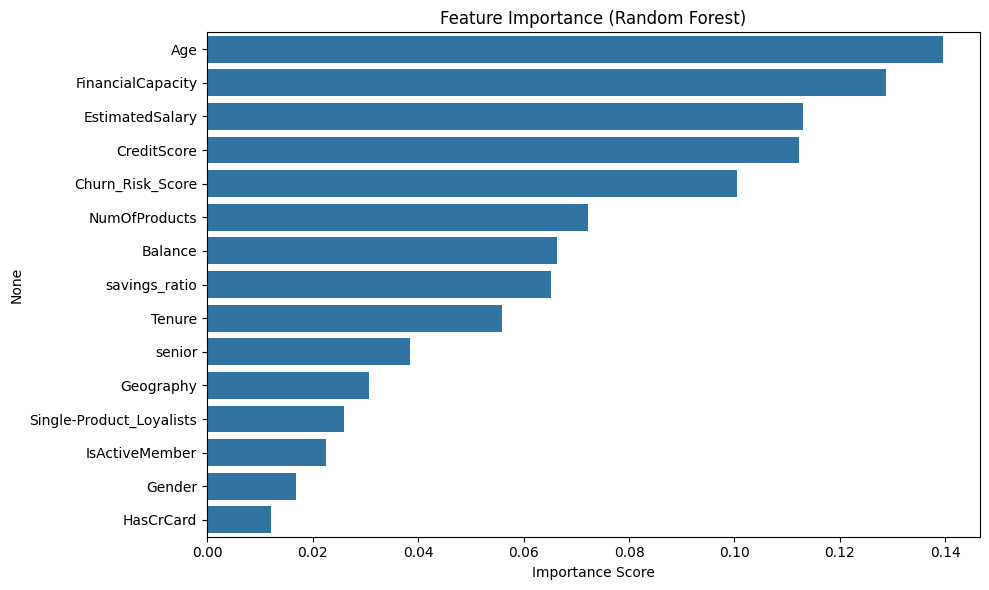

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     26052
           1       0.72      0.54      0.61      6955

    accuracy                           0.86     33007
   macro avg       0.80      0.74      0.76     33007
weighted avg       0.85      0.86      0.85     33007

ROC AUC Score: 0.8750


In [247]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

X = data_encoded.drop(['Exited','id','CustomerId','Surname'], axis=1)
y = data_encoded['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]



importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

재현율이 상당히 낮음..

In [248]:
data_encoded.drop(columns=['Single-Product_Loyalists'], inplace=True)

In [251]:
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary','FinancialCapacity','savings_ratio']
scaler = StandardScaler()
data_encoded[numeric_cols] = scaler.fit_transform(data_encoded[numeric_cols])
data_encoded.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn_Risk_Score,savings_ratio,FinancialCapacity,senior
0,0,15674932,Okwudilichukwu,0.144135,0,1,-0.578074,-0.719973,-0.883163,2,1.0,0.0,1.369486,0,1,-0.022925,-0.443900,0
1,1,15749177,Okwudiliolisa,-0.367706,0,1,-0.578074,-1.432694,-0.883163,2,1.0,1.0,-1.254085,0,0,-0.022925,-1.205219,0
2,2,15694510,Hsueh,0.268974,0,1,0.211354,1.774548,-0.883163,2,1.0,0.0,1.437422,0,1,-0.022925,-0.424186,0
3,3,15741417,Kao,-0.941966,0,1,-0.465299,-1.076334,1.486918,1,1.0,1.0,-0.557018,0,0,-0.003713,1.203044,0
4,4,15766172,Chiemenam,0.743362,2,1,-0.578074,-0.007253,-0.883163,2,1.0,1.0,-1.938770,0,0,-0.022925,-1.403904,0
